We want to predict several parameters: 
    
    * normalized seconds_to_complete
    * avg like (for cases with >20 ratings)
    * completion rate

In [1]:
RANDOM_STATE = 113

## Collect topic IDs with the target features

In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
file = '/home/anna/Documents/Diploma/code/new_cleaned/topics_all_statistics_and_scores.csv'

In [5]:
df = pd.read_csv(file)

In [6]:
df.head()

,step_id,is_theory,text,seconds_to_complete,last_3_month_completion_rate,last_3_month_completed_step_users_count,last_3_month_avg_like,last_3_month_likes_count,last_3_month_topic_completion_rate,last_3_month_completed_topic_users_count,...,cleaned_texts,num_headings,symbols_in_snippets,num_words,num_sentences,num_syllables,norm_seconds,ASL,flesch_score,dale_chall_score
0,12357,1,"""<h5 id=\""introduction\""> Introduction</h5>\n\...",603.45,0.56,40.0,2.00,10.0,0.90,35.0,...,""" *heading* So far you have learned quite a lo...",6,790,618,24,995,9.764563,25.750000,44.490012,9.180577
1,12691,1,"""<p>JavaScript was originally developed as a l...",253.21,0.87,884.0,1.72,79.0,0.96,844.0,...,"""JavaScript was originally developed as a lang...",5,35,605,35,962,4.185289,17.285714,54.769008,9.896400
2,8112,1,"""<p>We've already learned what annotations are...",486.94,0.45,50.0,1.57,7.0,0.89,49.0,...,"""We've already learned what annotations are an...",3,1506,610,30,990,7.982623,20.333333,48.895027,9.097296
3,7892,1,"""<h5>Introduction</h5>\n\n<p>You often hear pe...",542.73,0.72,60.0,2.00,5.0,0.91,58.0,...,""" *heading* You often hear people speak about ...",5,0,1079,51,1652,5.029935,21.156863,55.834186,9.207762
4,15809,1,"""<h5>Introduction</h5>\n\n<p>When you have alr...",556.76,0.43,43.0,1.40,10.0,0.91,53.0,...,""" *heading* When you have already learned the ...",5,409,633,21,995,8.795577,30.142857,43.258957,9.721412


In [7]:
step_id_topic_id_mapping = pickle.load(open('step_id_topic_id_mapping.pkl', 'rb'))

In [8]:
df_with_completions = df[df.last_3_month_completed_step_users_count > 20]

In [9]:
df_with_likes = df[df.last_3_month_likes_count > 20]

In [10]:
# last_3_month_completion_rate
# last_3_month_avg_like
# norm_seconds

In [11]:
topic_ids = []
completion_rates = []
seconds = []

for i, row in df_with_completions.iterrows():
    topic_id = step_id_topic_id_mapping[row.step_id]
    topic_ids.append(topic_id)
    completion_rates.append(row.last_3_month_completion_rate)
    seconds.append(row.norm_seconds)

In [12]:
completion_rates_df = pd.DataFrame({'topic_id': topic_ids, 'target': completion_rates})
completion_rates_df.head()

,topic_id,target
0,1235,0.56
1,1313,0.87
2,629,0.45
3,603,0.72
4,1685,0.43


In [13]:
completion_rates_df.to_csv('./new_cleaned/train_corpus/completion_rates.csv', index=False)

In [14]:
seconds_df = pd.DataFrame({'topic_id': topic_ids, 'target': seconds})
seconds_df.to_csv('./new_cleaned/train_corpus/normalized_seconds.csv', index=False)

In [15]:
topic_ids = []
likes = []

for i, row in df_with_likes.iterrows():
    topic_id = step_id_topic_id_mapping[row.step_id]
    topic_ids.append(topic_id)
    likes.append(row.last_3_month_avg_like)

In [16]:
likes_df = pd.DataFrame({'topic_id': topic_ids, 'target': likes})
likes_df.to_csv('./new_cleaned/train_corpus/avg_likes.csv', index=False)

In [17]:
print(seconds_df.shape[0])
print(likes_df.shape[0])

1061
591


## For a df with target features, collect linguistic and meta features

In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
import sklearn
from sklearn.model_selection import train_test_split

In [10]:
files = ['./new_cleaned/train_corpus/train_features/all_ling_features.csv',
         './new_cleaned/train_corpus/train_features/meta_features.csv',
         './new_cleaned/train_corpus/train_features/LM_feature.csv']

In [11]:
dfs = [pd.read_csv(file) for file in files]

In [12]:
dfs[0].head()

,topic_id,hpoint_lemma,Entropy_lemma,verbdistance_lemma,activity,ATL_token,TC_lemma,mattr_lemma_50,dale_chall_score,flesch_score,ASL
0,905,12.000000,6.815966,6.500000,0.728000,3.887262,0.034531,0.729842,8.658398,63.733344,22.346154
1,906,15.200000,7.080815,7.328571,0.661972,4.051695,0.027688,0.728612,9.531336,38.968934,29.843750
2,909,13.500000,7.413000,8.878788,0.537634,4.363095,0.033896,0.762795,9.591177,52.834292,16.620000
3,910,12.666667,6.981621,6.678899,0.709677,4.055164,0.000000,0.754446,8.616742,58.471407,23.375000
4,911,15.500000,6.930712,8.065574,0.647368,3.815013,0.043239,0.741551,8.801582,52.769228,31.600000


In [13]:
def collect_one_df(target_feature_df, list_train_feature_dfs):
    """
    A function that takes:
    1. a DF with only two columns: topic_id and target;
    2. a list of DFs with trainings features: they contain a column topic_is and several columns with other features.
    
    The function return a new DF where for each topic_id we have its target and all corresponding features from
    all given DFs.
    """
    all_features_from_dfs = []
    for df in list_train_feature_dfs:
        all_features_from_dfs.extend([el for el in df.columns.values if el != 'topic_id'])

    # new DF where we'll gather all data
    main_df = pd.DataFrame(columns=['topic_id', 'target'] + all_features_from_dfs)
    
    # iterate through topic ids in the DF with the target feature and extract corresponding features from other DFs
    for i, row in target_feature_df.iterrows():
        corresponding_rows = [df[df.topic_id == row.topic_id] for df in list_train_feature_dfs]
        corresponding_rows = [el.drop(columns=['topic_id']) for el in corresponding_rows]
        
        dict_with_values = dict()
        dict_with_values['topic_id'] = [row.topic_id]
        dict_with_values['target'] = [row.target]
        for j, corresponding_row in enumerate(corresponding_rows):
            
            assert not corresponding_row.empty, f'The row with topic id {row.topic_id} in the df #{j} does not exist'
            
            features = corresponding_row.columns.values

            for feature in features:
                dict_with_values[feature] = [corresponding_row[feature].values[0]]
    
        new_series = pd.DataFrame(dict_with_values)
        main_df = pd.concat((main_df, new_series), axis=0)
    
    assert target_feature_df.shape[0] == main_df.shape[0], f'The length of the initial target feature df and \
the resulting df with all features are different: {target_feature_df.shape[0]} and {main_df.shape[0]}\n{main_df.head()}'
    return main_df

In [71]:
f_name = 'completion_rates.csv' # 'avg_likes.csv' 'normalized_seconds.csv' 
df_to_use = pd.read_csv(f'./new_cleaned/train_corpus/target_features/{f_name}')

In [72]:
df_with_features = collect_one_df(df_to_use, dfs)

In [73]:
df_with_features.head()

,topic_id,target,hpoint_lemma,Entropy_lemma,verbdistance_lemma,activity,ATL_token,TC_lemma,mattr_lemma_50,dale_chall_score,flesch_score,ASL,overall_prereqs,direct_prereqs,num_snippets,num_img,num_sections,percent_code,GPT2_prob
0,1235.0,0.56,11.666667,6.959190,7.032967,0.747967,4.302826,0.067801,0.717349,9.180577,44.490012,25.750000,2,1,5,0,6,0.198144,0.016661
0,1313.0,0.87,10.400000,7.127101,7.188235,0.666667,4.286920,0.000000,0.750030,9.896400,54.769008,17.285714,7,2,2,2,5,0.011353,0.028016
0,629.0,0.45,12.000000,6.893623,6.216495,0.771654,4.329096,0.094185,0.767951,9.097296,48.895027,20.333333,82,2,5,0,3,0.329468,0.014322
0,603.0,0.72,16.000000,6.703374,10.447368,0.625000,3.787557,0.077458,0.634862,9.207762,55.834186,21.156863,2,1,0,0,5,0.000000,0.017144
0,1685.0,0.43,11.000000,6.809276,8.384615,0.642276,4.368775,0.135783,0.732248,9.721412,43.258957,30.142857,32,3,4,0,5,0.111902,0.028386


In [74]:
df_with_features.shape[0]

1061

In [75]:
X_data = np.array(df_with_features.drop(['topic_id', 'target'], axis=1))
y_data = np.array(df_with_features.target)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.15, random_state=RANDOM_STATE)

In [77]:
print(len(X_train), len(X_test))

901 160


## Try first example

In [22]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
#from sklearn.metrics import make_scorer, 
from sklearn.metrics import median_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
scaler = preprocessing.MinMaxScaler()
pipeline = Pipeline([('transformer', scaler), ('estimator', model)])

kf = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)

In [26]:
scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
scores

array([-0.10226093, -0.11303754, -0.11760952, -0.10871146, -0.12709401])

In [27]:
params = {
    'estimator__fit_intercept': [True, False],
}

# 'neg_root_mean_squared_error', 'neg_mean_absolute_error'
grid = GridSearchCV(pipeline, param_grid=params, cv=kf, scoring='neg_mean_absolute_error')

In [28]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=113, shuffle=True),
             estimator=Pipeline(steps=[('transformer', MinMaxScaler()),
                                       ('estimator', LinearRegression())]),
             param_grid={'estimator__fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [29]:
print(grid.best_score_)
print(grid.best_params_)  # this is a large error for likes

-0.11374269099687251
{'estimator__fit_intercept': True}


In [30]:
# now estimate on test
y_pred = grid.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

0.17241114665981191

In [31]:
from scipy.stats import spearmanr

In [32]:
score, pvalue = spearmanr(y_test, y_pred, nan_policy='raise')
print(score, pvalue)

0.20107768994288658 0.05882564062036767


## Prepare many models and their grid search parameters

### Check the target feature distributions

In [ ]:
# we have likes, completion rates and norm_seconds
# lets check their distributions and maybe choose different scoring metrics

In [ ]:
# MSE bad for outliers and possible large differences
# MAE - easily interpretable
# RMSE also penanizes higher difference more than MAE, always >= MAE

In [44]:
path = './new_cleaned/train_corpus'
likes = pd.read_csv(f'{path}/avg_likes.csv')
completion_rates = pd.read_csv(f'{path}/completion_rates.csv')
seconds = pd.read_csv(f'{path}/normalized_seconds.csv')

<AxesSubplot:>

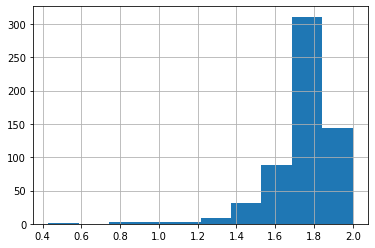

In [45]:
likes.target.hist()  
# most of them are between 1.4 and 2.0; so the evaluation metric should be sensitive to this range
# if the error is <0.05, it's fine

<AxesSubplot:>

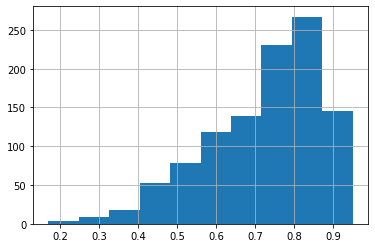

In [46]:
completion_rates.target.hist()
# they are between 0.4 and 1.0, the range is even smaller than with likes
# if the error is <0.05, it's fine

<AxesSubplot:>

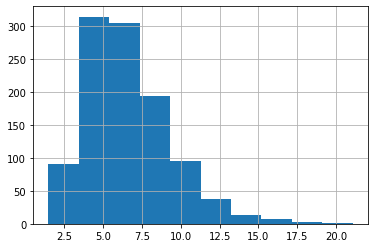

In [47]:
seconds.target.hist()
# they are between 0 and 20, there might be outliers
# if the error is <2 seconds, it's fine

### Prepare the models and grid search parameters for them

In [33]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
#from catboost import CatBoostRegressor
#from xgboost.sklearn import XGBRegressor
#from lightgbm import LGBMRegressor

ModuleNotFoundError: No module named 'lightgbm'

In [34]:
names = [
    'LinearRegression',
    'Lasso',
    'ElasticNet',
    'SGDRegressor',
    'BayesianRidge',
    'SVR',
    'KernelRidge',
    #'GradientBoostingRegressor'
]

In [35]:
regression_models = [
    LinearRegression(),
    Lasso(),
    ElasticNet(),
    SGDRegressor(),
    BayesianRidge(),
    SVR(),
    KernelRidge(),
    #GradientBoostingRegressor()
]

In [36]:
params_for_grid = {
    'LinearRegression': {'estimator__fit_intercept': [True, False]},
    'Lasso': {'estimator__alpha': [0.1, 0.5, 1., 2., 10],
              'estimator__random_state': [RANDOM_STATE]},
    'ElasticNet': {'estimator__alpha': [0.1, 0.5, 1., 2., 10],
                   'estimator__l1_ratio': [0., 0.3, 0.5, 0.7, 1.],
                   'estimator__random_state': [RANDOM_STATE]},
    'SGDRegressor': {'estimator__penalty': ['l2', 'l1', 'elasticnet'],
                     'estimator__alpha': [1e-6, 1e-4, 1e-2, 1., 10],
                     'estimator__random_state': [RANDOM_STATE],
                     'estimator__learning_rate': ['optimal', 'invscaling', 'adaptive']},
    'BayesianRidge': {'estimator__alpha_1': [1e-8, 1e-6, 1e-4, 1e-2],
                      'estimator__alpha_2': [1e-8, 1e-6, 1e-4, 1e-2],
                      'estimator__lambda_1': [1e-8, 1e-6, 1e-4, 1e-2],
                      'estimator__lambda_2': [1e-8, 1e-6, 1e-4, 1e-2]},
    'SVR': {'estimator__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'estimator__C': [0.2, 0.6, 1., 3., 5.]},
    'KernelRidge': {'estimator__alpha': [0.1, 0.25, 0.4, 0.55, 0.7, 0.85, 1.0, 2.0],
                    'estimator__kernel': ['linear', 'poly', 'rbf', 'chi2', 'sigmoid'],
                    'estimator__degree': [2, 3, 4]},
    #'GradientBoostingRegressor': {'estimator__learning_rate': [0.01, 0.02, 0.03, 0.04],
    #                              'estimator__subsample'    : [0.9, 0.5, 0.2, 0.1],
    #                              'estimator__n_estimators' : [100, 500, 1000, 1500],
    #                              'estimator__max_depth'    : [4, 6, 8, 10],
    #                              'estimator__loss': ['lad'],  # absolute_error
    #                              'estimator__random_state': [RANDOM_STATE],},
}

In [37]:
assert len(names) == len(regression_models)
assert len(regression_models) == len(params_for_grid)

### Run the search

In [78]:
best_results_from_regressors = dict()

In [79]:
for name, model in zip(names, regression_models):
    print(name)
    best_results_from_regressors[name] = dict()
    
    scaler = preprocessing.MinMaxScaler()
    pipeline = Pipeline([('transformer', scaler), ('estimator', model)])
    kf = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)
    
    grid_params = params_for_grid[name]
    grid = GridSearchCV(pipeline, param_grid=grid_params, cv=kf, scoring='neg_mean_absolute_error', n_jobs=1)
    print('Fit grid')
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    
    best_results_from_regressors[name]['best_score'] = grid.best_score_
    best_results_from_regressors[name]['best_params'] = grid.best_params_

LinearRegression
Fit grid
-0.09648895134917937
Lasso
Fit grid
-0.11975134398714696
ElasticNet
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.265741395560649, tolerance: 0.001601888319444445
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.691728994147614, tolerance: 0.0014974998058252427
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.957338408569197, tolerance: 0.001553273564493759
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of

-0.10941203005710472
SGDRegressor
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/py

-0.10190889598884767
BayesianRidge
Fit grid
-0.09678889807359524
SVR
Fit grid
-0.0956639742774917
KernelRidge
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

-0.09564824842125189


In [80]:
best_results_from_regressors

{'LinearRegression': {'best_score': -0.09648895134917937,
  'best_params': {'estimator__fit_intercept': True}},
 'Lasso': {'best_score': -0.11975134398714696,
  'best_params': {'estimator__alpha': 0.1, 'estimator__random_state': 113}},
 'ElasticNet': {'best_score': -0.10941203005710472,
  'best_params': {'estimator__alpha': 0.1,
   'estimator__l1_ratio': 0.0,
   'estimator__random_state': 113}},
 'SGDRegressor': {'best_score': -0.10190889598884767,
  'best_params': {'estimator__alpha': 1e-06,
   'estimator__learning_rate': 'adaptive',
   'estimator__penalty': 'l2',
   'estimator__random_state': 113}},
 'BayesianRidge': {'best_score': -0.09678889807359524,
  'best_params': {'estimator__alpha_1': 0.01,
   'estimator__alpha_2': 1e-08,
   'estimator__lambda_1': 1e-08,
   'estimator__lambda_2': 0.01}},
 'SVR': {'best_score': -0.0956639742774917,
  'best_params': {'estimator__C': 0.2, 'estimator__kernel': 'rbf'}},
 'KernelRidge': {'best_score': -0.09564824842125189,
  'best_params': {'estima

In [81]:
sorted(best_results_from_regressors.keys(), key=lambda el: best_results_from_regressors[el]['best_score'], reverse=True)

['KernelRidge',
 'SVR',
 'LinearRegression',
 'BayesianRidge',
 'SGDRegressor',
 'ElasticNet',
 'Lasso']

In [82]:
regressor = KernelRidge(alpha=0.1, degree=4, kernel='poly')
#SVR(C=1.0, kernel='rbf')
#SVR(C=0.2, kernel='sigmoid')
scaler = preprocessing.MinMaxScaler()
pipeline = Pipeline([('transformer', scaler), ('estimator', regressor)])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer', MinMaxScaler()),
                ('estimator', KernelRidge(alpha=0.1, degree=4, kernel='poly'))])

In [83]:
y_pred = pipeline.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

0.11829132288685619

In [84]:
# for now the best one is Gradient Boosting with MAE -0.106 -- but is's not very good for likes
best_regressor = GradientBoostingRegressor(learning_rate=0.01, loss='lad', max_depth=4, n_estimators=100, 
                                           random_state=RANDOM_STATE, subsample=0.2)
scaler = preprocessing.MinMaxScaler()
pipeline = Pipeline([('transformer', scaler), ('estimator', best_regressor)])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer', MinMaxScaler()),
                ('estimator',
                 GradientBoostingRegressor(learning_rate=0.01, loss='lad',
                                           max_depth=4, random_state=113,
                                           subsample=0.2))])

In [85]:
# now on test -- this was even smaller with the basic linear regression that was tried in the example
y_pred = pipeline.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

0.17550356322086239

In [86]:
score, pvalue = spearmanr(y_test, y_pred, nan_policy='raise')
print(score, pvalue)

0.26691947377480363 0.01145280726032164


### Perform the search for all targets

In [87]:
import pandas as pd

In [88]:
files_w_features = ['./new_cleaned/train_corpus/all_ling_features.csv',
                    './new_cleaned/train_corpus/meta_features.csv',
                    './new_cleaned/train_corpus/LM_feature.csv']

dfs_with_features = [pd.read_csv(el) for el in files_w_features]

In [89]:
likes_df = pd.read_csv('./new_cleaned/train_corpus/avg_likes.csv')
completion_df = pd.read_csv('./new_cleaned/train_corpus/completion_rates.csv')
norm_seconds_df = pd.read_csv('./new_cleaned/train_corpus/normalized_seconds.csv')

In [90]:
corpus_for_likes = collect_one_df(likes_df, dfs_with_features)
corpus_for_completion_rates = collect_one_df(completion_df, dfs_with_features)
corpus_for_norm_seconds = collect_one_df(norm_seconds_df, dfs_with_features)

In [93]:
def perform_all_training_and_evaluation(corpus_w_features):
    X_data = np.array(corpus_w_features.drop(['topic_id', 'target'], axis=1))
    y_data = np.array(corpus_w_features.target)
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.15, random_state=RANDOM_STATE)
    
    best_results_from_regressors = dict()
    
    for name, model in zip(names, regression_models):
        print(name)
        best_results_from_regressors[name] = dict()

        scaler = preprocessing.MinMaxScaler()
        pipeline = Pipeline([('transformer', scaler), ('estimator', model)])
        kf = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)

        grid_params = params_for_grid[name]
        grid = GridSearchCV(pipeline, param_grid=grid_params, cv=kf, scoring='neg_mean_absolute_error', n_jobs=1)
        print('Fit grid')
        grid.fit(X_train, y_train)
        print(grid.best_score_)

        best_results_from_regressors[name]['best_score'] = grid.best_score_
        best_results_from_regressors[name]['best_params'] = grid.best_params_
        best_results_from_regressors[name]['best_grid_pipeline'] = grid
    
    model_names_sorted_by_performance = sorted(best_results_from_regressors.keys(), 
                                               key=lambda el: best_results_from_regressors[el]['best_score'], 
                                               reverse=True)
    name_best = model_names_sorted_by_performance[0]
    
    print('<--------------------------------->')
    
    print(f'Best model is {name_best}')
    print(f"Best model's params: {best_results_from_regressors[name_best]['best_params']}.")
    print('Now, evaluation on the test data:')
    best_grid_pipeline = best_results_from_regressors[name_best]['best_grid_pipeline']
    y_pred = best_grid_pipeline.predict(X_test)
    error = mean_squared_error(y_test, y_pred, squared=False)
    print(f'MAE: {round(error, 4)}')

In [94]:
perform_all_training_and_evaluation(corpus_for_completion_rates)

LinearRegression
Fit grid
-0.09648895134917937
Lasso
Fit grid
-0.11975134398714696
ElasticNet
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.265741395560649, tolerance: 0.001601888319444445
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.691728994147614, tolerance: 0.0014974998058252427
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.957338408569197, tolerance: 0.001553273564493759
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of

-0.10941203005710472
SGDRegressor
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/py

-0.10190889598884767
BayesianRidge
Fit grid
-0.09678889807359524
SVR
Fit grid
-0.0956639742774917
KernelRidge
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

-0.09564824842125189
GradientBoostingRegressor
Fit grid
-0.09290297733372088
<--------------------------------->
Best model is GradientBoostingRegressor
Best model's params: {'estimator__learning_rate': 0.01, 'estimator__loss': 'lad', 'estimator__max_depth': 4, 'estimator__n_estimators': 1000, 'estimator__random_state': 113, 'estimator__subsample': 0.5}.
Now, evaluation on the test data:
MAE: 0.1189


In [95]:
perform_all_training_and_evaluation(corpus_for_norm_seconds)

LinearRegression
Fit grid
-1.5361415382032164
Lasso
Fit grid
-1.6495193084202004
ElasticNet
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2093.029132339108, tolerance: 0.5185263635844715
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1982.472020411094, tolerance: 0.4890114989392146
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2129.1857675165666, tolerance: 0.5247477023088707
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

-1.6495193084202004
SGDRegressor
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/py

-1.5301568549315943
BayesianRidge
Fit grid
-1.5313606621495317
SVR
Fit grid
-1.4941931303385716
KernelRidge
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

-1.512745297982777
GradientBoostingRegressor
Fit grid
-1.4735232360194412
<--------------------------------->
Best model is GradientBoostingRegressor
Best model's params: {'estimator__learning_rate': 0.01, 'estimator__loss': 'lad', 'estimator__max_depth': 4, 'estimator__n_estimators': 1500, 'estimator__random_state': 113, 'estimator__subsample': 0.9}.
Now, evaluation on the test data:
MAE: 2.4349


In [96]:
perform_all_training_and_evaluation(corpus_for_likes)

LinearRegression
Fit grid
-0.11374269099687251
Lasso
Fit grid
-0.11009867424684923
ElasticNet
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.554447120831865, tolerance: 0.0011303603990024935
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.585254120226621, tolerance: 0.0011364860349127183
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.001347444000531, tolerance: 0.001022789378109453
  positive)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number o

-0.10935417593332246
SGDRegressor
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/anna/.local/lib/py

-0.10995927243940429
BayesianRidge
Fit grid
-0.10969366015346224
SVR
Fit grid
-0.10729484834514638
KernelRidge
Fit grid


/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 166, in fit
    K = self._get_kernel(X)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/kernel_ridge.py", line 135, in _get_kernel
    filter_params=True, **params)
  File "/home/anna/.local/lib/python3.6/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/anna/.local/l

-0.110177837993369
GradientBoostingRegressor
Fit grid
-0.10639978108941586
<--------------------------------->
Best model is GradientBoostingRegressor
Best model's params: {'estimator__learning_rate': 0.01, 'estimator__loss': 'lad', 'estimator__max_depth': 4, 'estimator__n_estimators': 100, 'estimator__random_state': 113, 'estimator__subsample': 0.2}.
Now, evaluation on the test data:
MAE: 0.1755
